From the Official Kaggle Dataset Page (https://www.kaggle.com/sudalairajkumar/indian-startup-funding)

Interested in the Indian startup ecosystem just like me? Wanted to know what type of startups are getting funded in the last few years? Wanted to know who are the important investors? Wanted to know the hot fields that get a lot of funding these days? This dataset is a chance to explore the Indian start up scene. Deep dive into funding data and derive insights into the future!

This dataset Contains Information about Indian Startups from 2015-2019 regarding information about startups such as their location,amount of funding they have received etc.This dataset can help us understand the startup landscape and help us in comparing with current startup landscape in india.

In [1]:
'''Importing Libraries'''

import pandas as pd
import numpy as np
from matplotlib.pyplot import plot as plt
import seaborn as sns
import geopandas as gpd
import re

pd.set_option('display.max_rows',3000)

In [2]:
'''Load Data and rename columns to enable us to use dot notation and to parse Date as a datetime object which can 
give us much more insights with the dates.Header tells pandas to ignore the first line which is the header of the 
column

Having Some Issue with the Geomapping Code.Cleaned Up the Replace Method Now

Removing the Remarks Column Since there are around 85% values empty
'''

startup_data=pd.read_csv('startup_funding_modified.csv',header=0,encoding='utf8',names=['Sr_No','Startup_Date','Startup_Name','Industry_Vertical','SubVertical','City_Location','Investor_Name','Investment_Type','Amount_in_USD','Remarks'])

startup_data.drop(columns='Remarks',inplace=True)

In [20]:
'''Information about the memory consumption of the dataset.This step is important as it can tell us if we need to
read the dataset in chunks while reading the data in whichever format we have available'''

startup_data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3009 entries, 0 to 3008
Data columns (total 9 columns):
Sr_No                3009 non-null int64
Startup_Date         3009 non-null object
Startup_Name         3009 non-null object
Industry_Vertical    2838 non-null object
SubVertical          2073 non-null object
City_Location        2829 non-null object
Investor_Name        2986 non-null object
Investment_Type      3006 non-null object
Amount_in_USD        2045 non-null object
dtypes: int64(1), object(8)
memory usage: 1.6 MB


In [3]:
'''Basic stats about the dataset'''
startup_data.describe(include=['object','int'])

,Sr_No,Startup_Date,Startup_Name,Industry_Vertical,SubVertical,City_Location,Investor_Name,Investment_Type,Amount_in_USD
count,3009.000000,3009,3009,2838,2073,2829,2986,3006,2045
unique,NaN,1004,2434,811,1912,70,2380,50,487
top,NaN,08/07/2015,Ola Cabs,Consumer Internet,Online Lending Platform,Bangalore,Undisclosed Investors,Private Equity,"1,000,000"
freq,NaN,11,8,941,11,842,39,1356,161
mean,1526.737454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,884.509003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,756.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1530.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2292.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<b>Our Inference About the Above Basic Stats:</b>

<b>Ola Cabs is the Most Common Startup Name</b>.This could be because Ola is involved in a lot of verticals(Food,Item  Delivery,Grocery etc).Or it could also be because there is some labelling issue with the dataset.

<b>Out of 3000 records.almost a quarter(25%) of those startups belong to Bangalore.</b>This should be of no surprise as 
Bangalore is rightfully called the "Silicon Valley Of India."

<b>Most Investors try to acquire a part of the company in which they invest.</b>This is because they would like to see a positive return on their investment and also to help it grow.

You can refer to this link for More Information:https://www.investopedia.com/articles/financial-careers/09/private-equity.asp

In [4]:
'''Fixed Erroneous records from the dataset file so that no issues in python file.'''

startup_data["Startup_Date"]= pd.to_datetime(startup_data["Startup_Date"])

In [52]:
startup_data.head(10)

,Sr_No,Startup_Date,Startup_Name,Industry_Vertical,SubVertical,City_Location,Investor_Name,Investment_Type,Amount_in_USD,Rermarks,New_City_Location
0,0,05/09/2019,FPL Technologies,FinTech,Financial Services,Pune,"Matrix Partners India, Sequoia India",Maiden Round,"4,500,000",NaN,Maharashtra
1,1,04/09/2019,Cashflo,FinTech,Invoice discounting platform and SME lending m...,Mumbai,SAIF Partners,Series A,"3,300,000",NaN,Maharashtra
2,2,04/09/2019,Digital F5,"Advertising, Marketing",Digital marketing firm,Mumbai,TIW Private Equity,Private Equity Round,"6,000,000",NaN,Maharashtra
3,3,04/09/2019,3rdFlix,SaaS,Education Technology,Hyderabad,Exfinity Venture Partners,pre-series A,"5,000,000",NaN,Telangana
4,4,04/09/2019,75F,IoT,Building automation system,Burnsville,Breakthrough Energy Ventures,Series A,"18,000,000",NaN,NaN
5,5,04/09/2019,Myelin Foundry,Information Technology,Deep-technology,Bangalore,Endiya Partners,Seed,"10,00,000",NaN,Karnataka
6,6,04/09/2019,Atomberg Technology,Consumer Technology,"Consumer Electronics, Home Appliances",Mumbai,A91 Partners,Series A,"10,000,000",NaN,Maharashtra
7,7,04/09/2019,GOQii,Health and Wellness,Wearable Fitness Bands,California,Bennett Coleman and Company Ltd (BCCL),Series C,"450,000,000",NaN,NaN
8,8,03/09/2019,Vyapar App,Accounting,Mobile-based Accounting Software,Bangalore,"India Quotient, Axilor Ventures",Series A,"5,000,000",NaN,Karnataka
9,10,01/08/2019,CarDekho,E-Commerce,Automotive,Gurgaon,SC GG India Mobility Holdings LLC,Series C,"20,000,000",NaN,NCT of Delhi


In [56]:
geo_data=gpd.read_file('Admin2.shp')

In [8]:
# Panaji Ahemadabad Trivandrum Kochi Kanpur Surat Bhopal Gwalior Udupi Udaipur Agra Siliguri Karur Ahmedabad Delhi
# Kolkatta Hubli Lucknow Panaji Gaya Kozhikode Bhubneswar Jodhpur Varanasi Rourkela Belgaum Bhubaneswar New NCT of Delhi

city_data

0       Maharashtra
1       Maharashtra
2       Maharashtra
3         Telangana
4               NaN
           ...     
3004            NaN
3005            NaN
3006            NaN
3007            NaN
3008            NaN
Name: City_Location, Length: 3009, dtype: object

In [15]:
?pd.merge

In [59]:
new_dataframe=pd.merge(left=geo_data,right=startup_data,how='right',left_on='ST_NM',right_on='New_City_Location')

In [60]:
new_dataframe.New_City_Location.value_counts(dropna=True)

NCT of Delhi       886
Karnataka          846
Maharashtra        685
Telangana          100
Chennai             98
Gujarat             53
Rajasthan           33
West Bengal         24
Madhya Pradesh      18
Goa                 12
Chandigarh          11
Uttar Pradesh        9
Tamil Nadu           7
Kerala               6
Haryana              3
Bihar                2
Odisha               2
Jammu & Kashmir      1
Name: New_City_Location, dtype: int64

In [5]:
city_data=startup_data.City_Location

In [7]:
replacement_dictionary={"USA":np.NaN,"US":np.NaN,"US/India":np.NaN,"Dallas":np.NaN,"Boston":np.NaN,"New York":np.NaN,"London":np.NaN,"Nairobi":np.NaN,"SFO / Karnataka":np.NaN,"Seattle":np.NaN,"San Francisco":np.NaN,"Santa Monica":np.NaN,"Missourie":np.NaN,"India":np.NaN,"Palo Alto":np.NaN,"California":np.NaN,"SFO / Bangalore":np.NaN,"Burnsville":np.NaN,"Singapore":np.NaN,"Bangalore":"Karnataka","Belgaum":"Karnataka","Udupi":"Karnataka","New Delhi":"NCT of Delhi","Gurgaon":"NCT of Delhi","Noida":"NCT of Delhi","Delhi":"NCT of Delhi","Gurugram":"NCT of Delhi","Mumbai":"Maharashtra","Pune":"Maharashtra","Nagpur":"Maharashtra","Hyderabad":"Telangana","Faridabad":"Haryana","Surat":"Gujarat","Ahmedabad":"Gujarat","Ahemdabad":"Gujarat","Ahemadabad":"Gujarat","Vadodara":"Gujarat","Jaipur":"Rajasthan","Jodhpur":"Rajasthan","Udaipur":"Rajasthan","Kolkata":"West Bengal","Kolkatta":"West Bengal","Indore":"Madhya Pradesh","Bhopal":"Madhya Pradesh","Gwalior":"Madhya Pradesh","Coimbatore":"Tamil Nadu","Karur":"Tamil Nadu","Hubli":"Tamil Nadu","Panji":"Goa","Panaji":"Goa","Kozhikode":"Kerala","Trivandrum":"Kerala","Agra":"Uttar Pradesh","Kanpur":"Uttar Pradesh","Lucknow":"Uttar Pradesh","Varanasi":"Uttar Pradesh","Gaya":"Bihar","Bhubneswar":"Odisha","Bhubaneswar":"Odisha","New New Delhi":"NCT of Delhi","Nw Delhi":"NCT of Delhi","Kochi":"Kerala","Srinagar":"Jammu & Kashmir","Rourkela":"Bihar","Siliguri":"West Bengal"}

city_data=startup_data.City_Location.replace(replacement_dictionary)

startup_data['New_City_Location']=city_data

In [9]:
# print(new_dataframe.value_counts(dropna=False))
# print("####################")
# print(geo_data.ST_NM.unique())

In [75]:
new_dataframe.New_City_Location.dropna(inplace=True)

In [76]:
new_dataframe.New_City_Location.value_counts(dropna=False)

NCT of Delhi       886
Karnataka          846
Maharashtra        685
Telangana          100
Chennai             98
Gujarat             53
Rajasthan           33
West Bengal         24
Madhya Pradesh      18
Goa                 12
Chandigarh          11
Uttar Pradesh        9
Tamil Nadu           7
Kerala               6
Haryana              3
Bihar                2
Odisha               2
Jammu & Kashmir      1
Name: New_City_Location, dtype: int64

TypeError: '<' not supported between instances of 'float' and 'str'

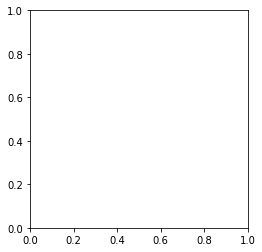

In [87]:
# fig, ax = plt.subplots(1, figsize=(10, 6))
new_dataframe=new_dataframe.loc[:,['ST_NM',"geometry","New_City_Location"]]

new_dataframe.plot(column='New_City_Location',cmap='Blues', linewidth=0.8, edgecolor='0.8')

In [88]:
new_dataframe.dtypes

ST_NM                  object
geometry             geometry
New_City_Location      object
dtype: object

In [324]:
startup_data.Amount_in_USD=startup_data.Amount_in_USD.replace(r'[,]','',regex=True)
# startup_data.Amount_in_USD=startup_data.Amount_in_USD.replace('\.\d*','',regex=True)
startup_data.Amount_in_USD=startup_data.Amount_in_USD.replace(r'\+*','',regex=True)

startup_data.drop(startup_data.loc[(startup_data.Amount_in_USD=='Undisclosed') | (startup_data.Amount_in_USD=='undisclosed')].index,inplace=True)

startup_data.Amount_in_USD.fillna(0,inplace=True)

startup_data.Amount_in_USD=pd.to_numeric(startup_data.Amount_in_USD)
# startup_data.Amount_in_USD=startup_data.Amount_in_USD.astype(int)

/home/dhruv/.local/lib/python3.6/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [325]:
startup_data.Amount_in_USD.value_counts(dropna=False)

0.000000e+00    964
1.000000e+06    166
5.000000e+05    108
2.000000e+06     68
5.000000e+06     67
3.000000e+06     65
1.000000e+07     61
1.000000e+05     57
1.500000e+05     45
2.000000e+05     44
2.500000e+05     41
1.500000e+07     39
6.000000e+06     39
1.500000e+06     36
4.000000e+06     35
3.000000e+05     31
2.500000e+06     25
6.000000e+05     24
5.000000e+07     22
2.000000e+07     21
4.000000e+05     21
1.200000e+06     20
3.000000e+07     18
2.500000e+07     18
1.000000e+08     17
4.500000e+05     17
7.000000e+06     16
3.500000e+05     14
7.500000e+05     13
1.200000e+07     13
1.600000e+07     12
8.000000e+06     12
4.500000e+06     12
1.100000e+06     12
1.100000e+07     11
3.500000e+06     11
6.500000e+05     10
5.000000e+04     10
1.300000e+06     10
7.000000e+05      9
3.500000e+07      9
3.100000e+06      9
7.500000e+06      8
1.200000e+05      8
1.800000e+05      8
6.000000e+07      8
4.000000e+04      7
1.800000e+07      7
1.600000e+05      7
9.000000e+05      7


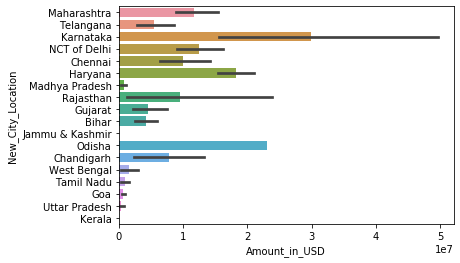

In [13]:
'''Inference
Karnataka has the Highest Number of Startups with the Most Value
Kerala has the least Startups in terms of value

Surprisingly,Value of Startups in Haryana is more than that of Maharashtra(Check Startups based on New City Localtion)
'''

sns.barplot(x='Amount_in_USD',y='New_City_Location',data=startup_data)

In [14]:
'''Percentage of Missing records'''

startup_data.isnull().sum()/len(startup_data)

Sr_No                0.000000
Startup_Date         0.000000
Startup_Name         0.000000
Industry_Vertical    0.056924
SubVertical          0.311585
City_Location        0.059920
Investor_Name        0.007656
Investment_Type      0.000999
Amount_in_USD        0.320905
New_City_Location    0.070905
dtype: float64

In [33]:
?sns.scatterplot

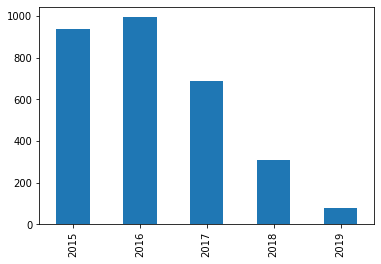

In [46]:
'''Inference
The startup scene in india basically peaked at around 2016 and has been on a decline ever since.Maybe some governmental factors have come into picture or there are too many people trying to jump in this field.This has resulted in lesser amount of funding for everybody
'''
startup_data.Startup_Date.dt.year.value_counts().sort_index().plot(kind='bar')

In [49]:
'''Startups which have received funding in the year 2019'''
startup_fund_2019=startup_data.loc[startup_data.Startup_Date.dt.year==2019]

In [50]:
max(startup_fund_2019.Amount_in_USD)

3900000000.0

In [51]:
min(startup_fund_2019.Amount_in_USD)

145000.0

In [55]:
startup_fund_2019.Amount_in_USD.mean()

82673686.96481013

In [56]:
startup_fund_2016=startup_data.loc[startup_data.Startup_Date.dt.year==2016]
print(max(startup_fund_2016.Amount_in_USD))

print(min(startup_fund_2016.Amount_in_USD))

print(startup_fund_2016.Amount_in_USD.mean())

200000000.0
22500.0
6532574.416382252


Inference for the above calculations.
Although the Number of startups which have got funding in the year 2019,there is still more money with these startups than our older startups.Maybe we can also check whether the startups which have received this new funding are well established startups or new Startups

In [67]:
list_startups_2019=startup_fund_2019.Startup_Name.unique().tolist()

In [66]:
'''Very Few Startups have received funding twice in the same financial year(Which is pretty rare) while almost all the others have received only funding once in the entire year.'''

Bira91                                                    2
CarDekho                                                  2
Uniphore                                                  2
Chakr Innovation                                          1
RenewBuy                                                  1
Azah                                                      1
Rapido Bike Taxi                                          1
Tala                                                      1
Kabadiwala                                                1
Shuttl                                                    1
House of Msasaba                                          1
NoBroker                                                  1
Pratilipi                                                 1
Craftsvilla                                               1
Atlan                                                     1
Biz2Credit                                                1
Ola Cabs                                

In [69]:
list_startups_2016=startup_fund_2016.Startup_Name.unique().tolist()

In [70]:
'''Here the difference in clear.The reason for more amount of funding received was due to more startups being launched and several of these startups received funding multiple times withing the same calender year(More than the number of startups in the year 2019)'''

NoBroker                     4
Koovs                        3
TinyStep                     3
Swiggy                       3
Byjus                        3
Simplilearn                  2
WorkIndia                    2
N.O.W                        2
LetsMD                       2
Murgency                     2
Pikkol                       2
ShareChat                    2
Servify                      2
Voonik                       2
Kartrocket                   2
Fisdom                       2
Medinfi                      2
Lenskart                     2
TripShelf                    2
GOQii                        2
FreshMenu                    2
RailYatri                    2
Druva                        2
Wooplr                       2
Furlenco                     2
OfBusiness                   2
Meesho                       2
Flyrobe                      2
Tracxn                       2
Moglix                       2
Zarget                       2
Mobikwik                     2
Bonhomia

In [74]:
set(list_startups_2016).intersection(list_startups_2019)

set()

Inference:The startups that were in 2019 were not present earlier in our dataset(Almost all of them were new or not launched in 2019).Maybe we can find some external reason for such a drastic rise and drop in the funding patterns.

In [234]:
'''Important Investors throughout the Years (Overall) and also investors for the year 2016 and 2019 for the comparisison'''

list_investors=startup_data.copy()

In [235]:
list_investors.Investor_Name.fillna(" ",inplace=True)

In [236]:
list_investors.Investor_Name.isna().sum()

0

Looking at the type of data that we have,we need to clean the file because the file has a few names in floating type which is obviously a mistake.Turns out,the NaN's  in the filename are represented as a number.Did the same using fillna method

In [237]:
list_investors['Investor_Name']=list_investors.Investor_Name.replace(r'\band\b|\b& others\b|\bothers\b|\b& Others\b|\bUndisclosed investors\b','',regex=True)

replacement_dictionary={"Unknown High Net-Worth Individuals":"Undisclosed Investors","Undisclosed":"Undisclosed Investors","":"Undisclosed Investors"}

list_investors['Investor_Name']=list_investors.Investor_Name.replace(replacement_dictionary)

new_investors=list_investors.Investor_Name.apply(lambda x:x.split(','))
new_investors_separate=[]

In [238]:
new_investors_separate=[data.strip() for item in new_investors for data in item if data not in new_investors_separate or data != ' ']

In [239]:
new_investor_series=pd.Series(data=new_investors_separate,name='Name')
new_investor_series=new_investor_series.loc[new_investor_series!='']

In [247]:
'''List of Top 10 Investment Personalities/Firms. in the Indian Startup Scene.
Firms are much more active in the Participation scene as they have more money to spend obviously.
'''
new_investor_series.value_counts().head(11)

Undisclosed Investors     81
Sequoia Capital           72
Accel Partners            69
Kalaari Capital           49
SAIF Partners             48
Blume Ventures            47
Indian Angel Network      42
Ratan Tata                31
Nexus Venture Partners    30
Rajan Anandan             29
Tiger Global              28
Name: Name, dtype: int64

In [64]:
?list_investors.Investor_Name.fillna

In [243]:
?pd.Series.drop

In [285]:
'''Top 10 Investors in the Year 2016'''

list_investors_2016=list_investors.loc[list_investors.Startup_Date.dt.year==2016]
new_investors_2016=list_investors_2016.Investor_Name.apply(lambda x:x.split(','))
new_investors_separate_2016=[]
new_investors_separate_2016=[data.strip() for item in new_investors_2016 for data in item if data not in new_investors_separate_2016 or data != ' ']

new_investor_series_2016=pd.Series(data=new_investors_separate_2016,name='Name')
new_investor_series_2016=new_investor_series_2016.loc[new_investor_series_2016!='']

new_investor_series_2016.value_counts().head(11)

Undisclosed Investors    37
Indian Angel Network     24
Accel Partners           18
Kalaari Capital          18
Ratan Tata               17
Blume Ventures           17
Sequoia Capital          15
SAIF Partners            13
Kunal Shah               13
Anupam Mittal            11
Sandeep Tandon           11
Name: Name, dtype: int64

In [286]:
'''Top 10 Investors in the year 2019'''

list_investors_2019=list_investors.loc[list_investors.Startup_Date.dt.year==2019]
new_investors_2019=list_investors_2019.Investor_Name.apply(lambda x:x.split(','))
new_investors_separate_2019=[]
new_investors_separate_2019=[data.strip() for item in new_investors_2019 for data in item if data not in new_investors_separate_2019 or data != ' ']

new_investor_series_2019=pd.Series(data=new_investors_separate_2019,name='Name')
new_investor_series_2019=new_investor_series_2019.loc[new_investor_series_2019!='']

new_investor_series_2019.value_counts().head(11)

Tiger Global Management              5
Sequoia India                        4
Binny Bansal                         3
March Capital Partners               2
Sixth Sense Ventures                 2
Alpha Mundi                          1
WaterBridge Ventures                 1
SC GG India Mobility Holdings LLC    1
Nexus Venture Partners               1
BAC Acquisitions                     1
Hillhouse Capital                    1
Name: Name, dtype: int64

<b>Inference</b>:From both the years,as the bar graph shows,the number of investments were more due to big players such as Indian Angel Network,Accel Partners etc Investing more in the Startups in india at that point of time.

However in the year 2019,none of the same big players invested money into the startups in the year 2019 with as much intensity as during the 2016 year.

In [326]:
"""What's in a Name.
In this,i will check for some common ending words assoicated with daily language and alos see startups which have mispronounced words(Say Combat to Kombat etc to see if the name has anything to do with the kind of funding that it receives.

We have 2429 unique names and the rest i believe are Some Startups that would have received funding multiple times
"""

name_data=startup_data.copy()

In [327]:
len(name_data.Startup_Name.unique())

2429

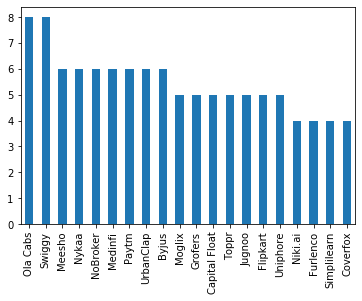

In [344]:
"""In case you were wondering how we have Ola Cabs and Ola separately,it's because they are 2 separate organisations altogether.Kind of like Alphabet and Google"""

name_data.Startup_Name.value_counts().head(20).plot(kind='bar')

In [341]:
'''Finding Startups with The words Ai,.com,kart,eat etc in the title'''

name_data['Ai_in_Name']=name_data.Startup_Name.str.find('.ai')
ai_data=name_data.loc[name_data.Ai_in_Name!=-1]
ai_data.Amount_in_USD.sum()

36950000.0

In [339]:
name_data['com_in_Name']=name_data.Startup_Name.str.find('.com')
com_data=name_data.loc[name_data.com_in_Name!=-1]

com_data.Amount_in_USD.sum()

1081585000.0

In [340]:
name_data['kart_in_Name']=name_data.Startup_Name.str.find('kart')
kart_data=name_data.loc[name_data.kart_in_Name!=-1]
kart_data.Amount_in_USD.sum()

4929800000.0

In [333]:
'''No Startup has the word food in them which i thought should be a common word for many food/health/wellness based startups'''

name_data['food_in_Name']=name_data.Startup_Name.str.find('food')
name_data.loc[name_data.food_in_Name!=-1]

,Sr_No,Startup_Date,Startup_Name,Industry_Vertical,SubVertical,City_Location,Investor_Name,Investment_Type,Amount_in_USD,New_City_Location,Ai_in_Name,com_in_Name,kart_in_Name,food_in_Name


<b>Inference:</b>
<br/>
<br/>
Funding for Statups with the <b>.ai</b> suffix in their name:<b>36950000.0</b>
<br/>
Funding for Statups with the <b>.com</b> suffix in their name:<b>1081585000.0</b>
<br/>
Funding for Statups with the <b>kart</b> in their name:<b>4929800000.0</b>

All the Amounts are in USD

Although not always possible,having the word <b>kart</b> leads some kind of crediblity/idea about your business to potential investors which maybe allows them to invest more  money into your business.

Pure AI based companies i guess still have a long time to go in terms of the funding they received because comapared to traditional E commerce websites and apps,they are quite behind.

In [345]:
name_data.Startup_Name.value_counts()

Ola Cabs                                                  8
Swiggy                                                    8
Meesho                                                    6
Nykaa                                                     6
NoBroker                                                  6
Medinfi                                                   6
Paytm                                                     6
UrbanClap                                                 6
Byjus                                                     6
Moglix                                                    5
Grofers                                                   5
Capital Float                                             5
Toppr                                                     5
Jugnoo                                                    5
Flipkart                                                  5
Uniphore                                                  5
Niki.ai                                 

In [ ]:
'''Collection of Startup names with Meaningful Names/Spelling Mistake Names.
Nykaa:Derived from the Word nayaka meaning heroine
NoBroker:Platform for owners to directly list their houses/apartments for rent.
Toppr:Play on the Word Topper
1mg:Medicine Quantity
Unacademy:Kind of Un Learning Place/Re learn new things
Zoctr:play on the word doctor
Fynd:play on the word find
Droom:play on the word vroom
Wassup:play on the word ssup/whassup
Delhivery:Delivery
Shuttl:Shuttle Bus
DriveU:driver/Self Drive
Licious:Delicious
Quikr:Do Something Quick/Quick Kar
Innov8:innovate
Teabox:Chai ka Dabba
Unbxd:Unboxed
Jhakaas:Excellent/Great
Zarget:Target
iOrderFresh:I Order Fresh Food/Items etc
happay:happy and payment
Smytten:Smitten
Chumbak:magnet
MeraDoctor:Personal Doctor
Innoviti:Innovate
Kissht:Installment
3HCare:healthCare?
Chillr:Change
MoneyOnMobile:Paisa Mobile Pe
Aasaanjobs:Easy Jobs
YourStory:Aapki Kahani
Rupaiya Exchange
Naaptol.com
Liqvid
Gaana.com
PaisaWapas
Pluss
Vyapar App
Register My Marriage
CaRPM 
KleverKid
CupoNation
CashFree
Eatfresh

The above names should be enough for me to try our hypothesis
'''